<a href="https://colab.research.google.com/github/danbikiki/machine-learning/blob/master/200819_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#구글 드라이브+코랩 연결
-작업환경:구글 코랩
-데이터: 구글 드라이브
###연동

In [2]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
%ls

drive/  sample_data/


In [5]:
%cd drive/'My Drive'/'Colab Notebooks'/'ml_project'

/content/drive/My Drive/Colab Notebooks/ml_project


In [6]:
%ls

gender_submission.csv  test.csv  train.csv


In [7]:
import pandas as pd
from pandas.io import gbq

# import submission file in Google Drive
train = pd.read_csv('train.csv')
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
train.to_gbq(destination_table='titanic_classification.train', 
                  project_id='nomadic-poet-286903', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=fclFGI8YDEH9kh4yvOWr53JUtf9IL2&prompt=consent&access_type=offline
Enter the authorization code: 4/3AGa-Q0Vxs3NNZObYSilJHCsaIo3ZMjIC6YAkNjg7UCTVMndq4vJNPw


1it [00:03,  3.19s/it]


In [9]:
train.to_gbq(destination_table='titanic_classification.test', 
                  project_id='nomadic-poet-286903', 
                  if_exists='replace')

1it [00:03,  3.23s/it]


In [11]:
train.to_gbq(destination_table='titanic_classification.gender_submission', 
                  project_id='nomadic-poet-286903', 
                  if_exists='replace')

1it [00:03,  3.56s/it]


#kaggle에서 api로 다운받기

In [12]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

#이러고 아래에 파일 선택 나오면 바탕화면에 있는 kaggle.json 갖다 붙이면 됨!

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 65 bytes


In [13]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        162           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        374           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2781           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      20418           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5159           False  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        853           False  
nlp-gett

In [14]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

403 - Forbidden


In [15]:
!ls

gender_submission.csv  test.csv  train.csv


In [16]:
!kaggle competitions download -c titanic

403 - Forbidden


In [17]:
!ls

gender_submission.csv  test.csv  train.csv


#데이터 피처공학
###(1)주요 패키지 불러오기


In [47]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

###(2)데이터 불러오기

In [63]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [64]:
# 구글 인증 라이브러리
from google.colab import auth

# 빅쿼리 관련 라이브러리
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

In [68]:
gcloud config set project TITANIC

SyntaxError: ignored

In [69]:
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'nomadic-poet-286903'
client = bigquery.Client(project=project_id)

df_train = client.query('''
  SELECT 
      * 
  FROM `nomadic-poet-286903.titanic_classification.train`
  ''').to_dataframe()

df_train.shape

(891, 12)

In [71]:
df_test = client.query('''
  SELECT 
      * 
  FROM `nomadic-poet-286903.titanic_classification.test`
  ''').to_dataframe()

df_test.shape

(891, 12)

In [72]:
pd.options.display.max_columns = None 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,None,S
1,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
2,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,None,S
3,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,None,S
4,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,None,S


###(3)결측 데이터 확인

In [73]:
# data set의 Percent 구하는 함수를 짜보자. 
def check_fill_na(data):
  new_df = data.copy()
  new_df_na = (new_df.isnull().sum() / len(new_df)) * 100
  new_df_na.sort_values(ascending=False).reset_index(drop=True)
  new_df_na = new_df_na.drop(new_df_na[new_df_na == 0].index).sort_values(ascending=False)
  return new_df_na

check_fill_na(df_train)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

-각 데이터에 대한 구체적인 그래프를 작성

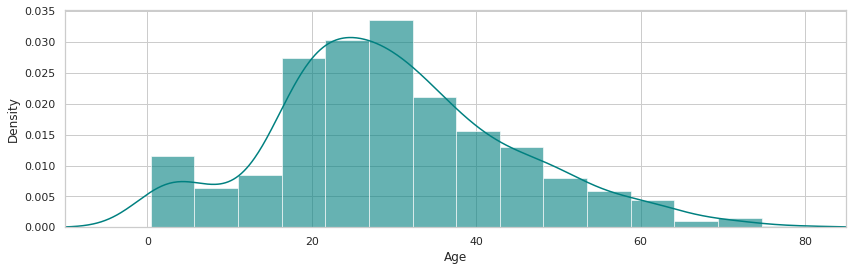

In [74]:
ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


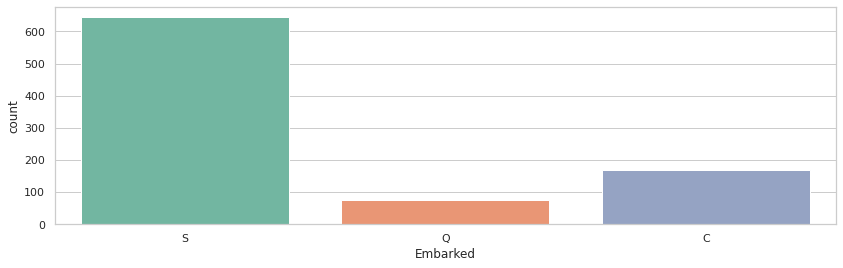

In [75]:
print(df_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df_train, palette='Set2')
plt.show()

In [76]:
train_data = df_train.copy()
train_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [77]:
check_fill_na(train_data)

Series([], dtype: float64)

###(4)도출변수

In [85]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,180,0,3,"Leonard, Mr. Lionel",male,36.0,LINE,0.0000,S,1
1,264,0,1,"Harrison, Mr. William",male,40.0,112059,0.0000,S,1
2,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,239853,0.0000,S,1
3,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,LINE,0.0000,S,1
4,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,239853,0.0000,S,1
...,...,...,...,...,...,...,...,...,...,...
886,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,349240,7.8958,C,1
887,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,36947,78.2667,C,0
888,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,36947,78.2667,C,0
889,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,11967,91.0792,C,0


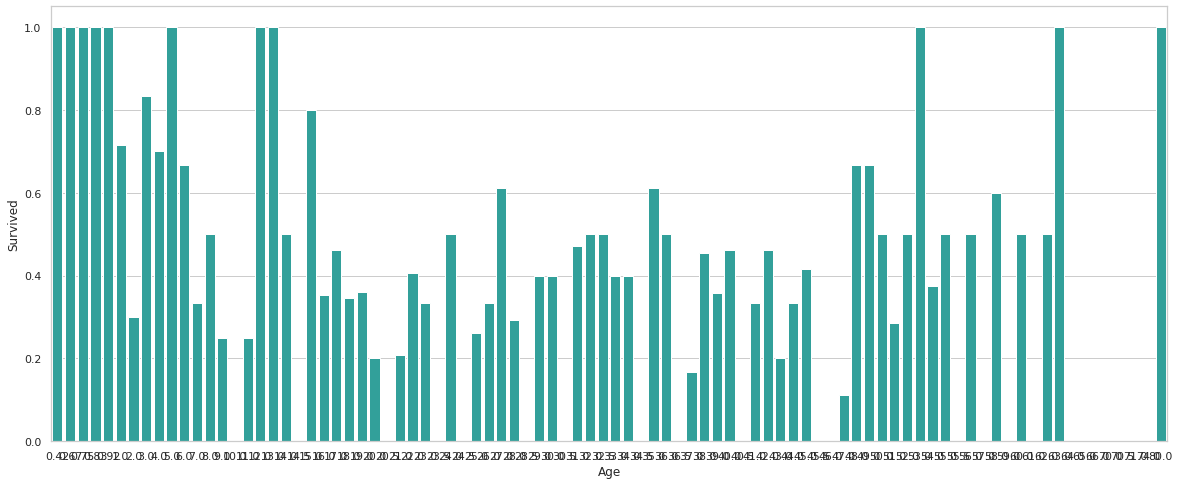

In [79]:
plt.figure(figsize=(20,8))
avg_survival_byage = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [86]:
train_data['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

#원-핫 인코딩

In [87]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int64  
 4   IsMinor      891 non-null    int64  
 5   Pclass_1     891 non-null    uint8  
 6   Pclass_2     891 non-null    uint8  
 7   Pclass_3     891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB


In [88]:
test_data = df_test.copy()
test_data["Age"].fillna(df_test["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(df_test["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

test_data['IsMinor']=np.where(test_data['Age']<=16, 1, 0)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int64  
 4   IsMinor      891 non-null    int64  
 5   Pclass_1     891 non-null    uint8  
 6   Pclass_2     891 non-null    uint8  
 7   Pclass_3     891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB


###(6)피처 선택

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
model = LogisticRegression()
rfe = RFE(model, 8) # 변수 8개만 선택
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


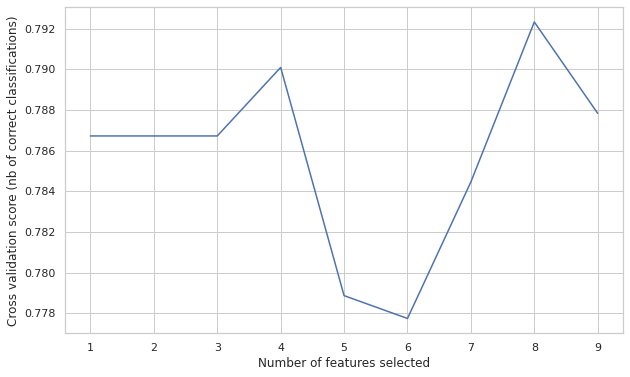

In [91]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [92]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']

#머신러닝

Train/Test split results:
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.460
LogisticRegression auc is 0.852


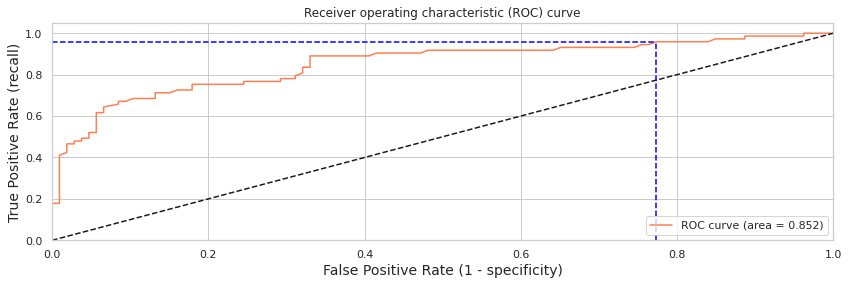

Using a threshold of 0.086 guarantees a sensitivity of 0.959 and a specificity of 0.226, i.e. a false positive rate of 77.36%.


In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# 데이터 셋 분리 
X = final_train[Selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 로지스틱 회귀모형
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # threshold 

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [95]:
final_test['Survived'] = logreg.predict(final_test[Selected_features])
final_test['PassengerId'] = df_test['PassengerId']
submission = final_test[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)
print(submission.tail())

     PassengerId  Survived
886          456         0
887          497         1
888          592         1
889          292         1
890          485         1
